##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Running TFLite models

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20Deployment/Course%202%20-%20TensorFlow%20Lite/Week%201/Examples/TFLite_Week1_Linear_Regression.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/lmoroney/dlaicourse/blob/master/TensorFlow%20Deployment/Course%202%20-%20TensorFlow%20Lite/Week%201/Examples/TFLite_Week1_Linear_Regression.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
</table>

## Setup

In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass

In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.0.0


## Create a Basic Model of the Form y = mx + c

In [2]:
# Create a simple Keras model.
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer='sgd',
              loss='mean_squared_error')

model.fit(x, y, epochs=200)

Train on 6 samples
Epoch 1/200
6/6 [==============================] - 1s 180ms/sample - loss: 26.3386
Epoch 2/200
6/6 [==============================] - 0s 2ms/sample - loss: 21.0184
Epoch 3/200
6/6 [==============================] - 0s 2ms/sample - loss: 16.8267
Epoch 4/200
6/6 [==============================] - 0s 2ms/sample - loss: 13.5229
Epoch 5/200
6/6 [==============================] - 0s 2ms/sample - loss: 10.9177
Epoch 6/200
6/6 [==============================] - 0s 2ms/sample - loss: 8.8624
Epoch 7/200
6/6 [==============================] - 0s 3ms/sample - loss: 7.2398
Epoch 8/200
6/6 [==============================] - 0s 3ms/sample - loss: 5.9577
Epoch 9/200
6/6 [==============================] - 0s 2ms/sample - loss: 4.9436
Epoch 10/200
6/6 [==============================] - 0s 3ms/sample - loss: 4.1405
Epoch 11/200
6/6 [==============================] - 0s 3ms/sample - loss: 3.5036
Epoch 12/200
6/6 [==============================] - 0s 2ms/sample - loss: 2.9974
Epoch 13/20

Epoch 102/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.1891
Epoch 103/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.1852
Epoch 104/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.1814
Epoch 105/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.1777
Epoch 106/200
6/6 [==============================] - 0s 3ms/sample - loss: 0.1741
Epoch 107/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.1705
Epoch 108/200
6/6 [==============================] - 0s 1ms/sample - loss: 0.1670
Epoch 109/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.1636
Epoch 110/200
6/6 [==============================] - 0s 1ms/sample - loss: 0.1602
Epoch 111/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.1569
Epoch 112/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.1537
Epoch 113/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.1505
Epoch 114/200
6/

## Generate a SavedModel

In [4]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1\assets


## Convert the SavedModel to TFLite

In [6]:
# Convert the model.
export_dir = 'saved_model/1'
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [6]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

780

## Initialize the TFLite Interpreter To Try It Out

In [7]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_details

[{'name': 'dense_input',
  'index': 3,
  'shape': array([1, 1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

In [6]:
interpreter = tf.lite.Interpreter(model_path='mobilenet_v1_1.0_224_quant.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_details

[{'name': 'input',
  'index': 88,
  'shape': array([  1, 224, 224,   3], dtype=int32),
  'dtype': numpy.uint8,
  'quantization': (0.0078125, 128)}]

In [9]:
interpreter = tf.lite.Interpreter(model_path='converted_model.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_details

[{'name': 'keras_layer_input',
  'index': 175,
  'shape': array([  1, 224, 224,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

In [10]:
interpreter = tf.lite.Interpreter(model_path='detect.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_details

[{'name': 'normalized_input_image_tensor',
  'index': 175,
  'shape': array([  1, 300, 300,   3], dtype=int32),
  'dtype': numpy.uint8,
  'quantization': (0.0078125, 128)}]

In [14]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(10):
    input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])
    #print(tflite_results[0][0])
    
    # Test the TensorFlow model on random input data.
    #tf_results = model(tf.constant(input_data))
    #output_data = np.array(tf_results)
    
    inputs.append(input_data[0][0])
    outputs.append(tflite_results[0][0])

0.8805611
0.72878873
-0.06126362
-0.6924758
-0.5320999
-0.24738264
0.4002949
0.98376834
0.22165596
-0.64928246


## Visualize the Model

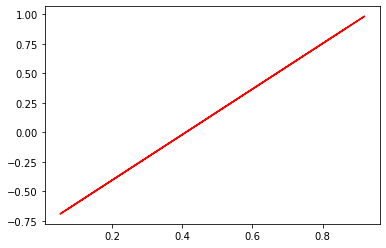

In [15]:
%matplotlib inline

plt.plot(inputs, outputs, 'r')
plt.show()

## Download the TFLite Model File

If you are running this notebook in a Colab, you can run the cell below to download the tflite model to your local disk. 

**Note**: If the file does not download when you run the cell, try running the cell a second time.

In [ ]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass